<a href="https://colab.research.google.com/github/Abdulwaliy/Schizophrenia_Unsupervised_Classification/blob/main/Schizophrenia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyreadstat
!pip install joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.4 MB/s eta 0:00:00


In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

In [2]:
from joblib import load

In [4]:
df  = load("all_features.sav")

In [5]:
df

,Fp1_100ms_1KHz,Fp1_200ms_1KHz,Fp1_300ms_1KHz,Fp1_400ms_1KHz,Fp1_450ms_1KHz,Fp2_100ms_1KHz,Fp2_200ms_1KHz,Fp2_300ms_1KHz,Fp2_400ms_1KHz,Fp2_450ms_1KHz,...,centralEntropy(rest1),centralEntropy(arith),centralEntropy(rest2),temporalEntropy(rest1),temporalEntropy(arith),temporalEntropy(rest2),occipitalEntropy(rest1),occipitalEntropy(arith),occipitalEntropy(rest2),category
0,0.077860,-0.182622,0.279247,0.532200,-0.204365,0.250417,-0.064930,-0.427962,-0.472420,0.012483,...,4.708212,5.347806,4.070785,3.946784,7.267044,6.139753,3.450770,6.804647,5.446045,Patient
1,0.771830,0.206960,-0.262004,0.052639,-0.076961,-0.243638,0.362590,0.186396,-0.309906,-0.096431,...,3.826274,5.307421,4.016737,4.915720,6.760551,6.758200,4.689644,6.680529,5.899697,Patient
2,0.586741,-0.170640,-0.447587,-0.586851,-0.381786,-0.296674,0.182709,0.486881,0.388464,0.047760,...,4.834667,5.215472,4.626053,5.276843,5.360532,4.124572,4.683634,5.259149,4.498702,Control
3,0.406416,-0.055197,0.553940,0.478676,-0.329155,0.078385,-0.046267,-0.688571,-0.429975,-0.139107,...,4.231745,4.856989,4.104290,4.231455,5.128124,4.112604,3.917604,5.116586,4.163938,Control
4,-0.716653,0.162533,0.245087,0.260570,0.948333,0.447810,-0.711307,-0.258017,-0.445835,-0.478240,...,2.810725,3.301983,2.316321,3.448287,3.642040,1.481799,2.898205,3.508655,2.293268,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.131547,-0.219495,-0.509017,-0.153254,-0.009139,-0.074702,-0.037133,0.577866,0.296354,-0.106854,...,5.876492,5.096309,4.608735,4.173505,4.406099,3.472415,4.098777,3.827062,3.259458,Patient
132,0.563544,-0.180867,0.515578,0.256098,-0.536390,-0.799402,-0.076736,-0.284262,-0.066965,0.813242,...,4.930608,5.385484,4.592640,2.156568,3.268550,2.712804,2.960171,4.013752,3.406599,Patient
133,-0.219072,-0.407502,-0.592036,-0.634921,-0.617784,0.118141,0.169849,0.316253,0.349186,0.427360,...,4.506565,4.438385,4.425235,2.168441,3.256229,2.607451,2.997869,3.499765,3.183837,Patient
134,0.010683,0.865144,0.365844,0.204637,-0.635631,-0.050809,-0.858660,-0.221464,0.013031,0.647625,...,4.051593,4.820291,3.557163,1.897038,3.600962,2.215628,2.808181,3.893321,2.589370,Patient


In [6]:
print(df.describe)

<bound method NDFrame.describe of      Fp1_100ms_1KHz  Fp1_200ms_1KHz  Fp1_300ms_1KHz  Fp1_400ms_1KHz  \
0          0.077860       -0.182622        0.279247        0.532200   
1          0.771830        0.206960       -0.262004        0.052639   
2          0.586741       -0.170640       -0.447587       -0.586851   
3          0.406416       -0.055197        0.553940        0.478676   
4         -0.716653        0.162533        0.245087        0.260570   
..              ...             ...             ...             ...   
131       -0.131547       -0.219495       -0.509017       -0.153254   
132        0.563544       -0.180867        0.515578        0.256098   
133       -0.219072       -0.407502       -0.592036       -0.634921   
134        0.010683        0.865144        0.365844        0.204637   
135        0.569502       -0.268815        0.122630       -0.236421   

     Fp1_450ms_1KHz  Fp2_100ms_1KHz  Fp2_200ms_1KHz  Fp2_300ms_1KHz  \
0         -0.204365        0.250417       

In [7]:
print(df.dtypes)

Fp1_100ms_1KHz             float64
Fp1_200ms_1KHz             float64
Fp1_300ms_1KHz             float64
Fp1_400ms_1KHz             float64
Fp1_450ms_1KHz             float64
                            ...   
temporalEntropy(rest2)     float64
occipitalEntropy(rest1)    float64
occipitalEntropy(arith)    float64
occipitalEntropy(rest2)    float64
category                    object
Length: 321, dtype: object


In [8]:
print(len(df.columns))

321


In [11]:
df_array = df.to_numpy()
print(df_array)

[[0.07785998369847247 -0.18262150928788462 0.27924696724418463 ...
  6.80464721431986 5.446045171220329 'Patient']
 [0.7718297711846533 0.20695988507074226 -0.26200437930966675 ...
  6.680528553714408 5.899696630139561 'Patient']
 [0.5867410937255846 -0.1706399007117978 -0.44758740927149576 ...
  5.259148526308027 4.498701774720755 'Control']
 ...
 [-0.21907150482429585 -0.4075022293343473 -0.5920357460158212 ...
  3.4997650313304214 3.1838365377833804 'Patient']
 [0.010682525294788695 0.8651437560045615 0.3658441787158651 ...
  3.893320689287904 2.5893702139583707 'Patient']
 [0.5695018892836629 -0.2688146882577005 0.12263030769601051 ...
  3.3490038009010052 2.5680016356296105 'Patient']]


In [37]:
df1 = df.iloc[:,0:320].values
print(df1)

[[0.07785998369847247 -0.18262150928788462 0.27924696724418463 ...
  3.45077043549314 6.80464721431986 5.446045171220329]
 [0.7718297711846533 0.20695988507074226 -0.26200437930966675 ...
  4.6896436246070605 6.680528553714408 5.899696630139561]
 [0.5867410937255846 -0.1706399007117978 -0.44758740927149576 ...
  4.683634159393287 5.259148526308027 4.498701774720755]
 ...
 [-0.21907150482429585 -0.4075022293343473 -0.5920357460158212 ...
  2.9978693548441333 3.4997650313304214 3.1838365377833804]
 [0.010682525294788695 0.8651437560045615 0.3658441787158651 ...
  2.8081810643074356 3.893320689287904 2.5893702139583707]
 [0.5695018892836629 -0.2688146882577005 0.12263030769601051 ...
  2.597341558091854 3.3490038009010052 2.5680016356296105]]


In [63]:
df1 = StandardScaler().fit_transform(df1)

In [92]:
pca = PCA(n_components=2)

#Transform the data
X = pca.fit_transform(df1)

In [84]:
#elbow method
inertias = []

for i in range(1,137):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

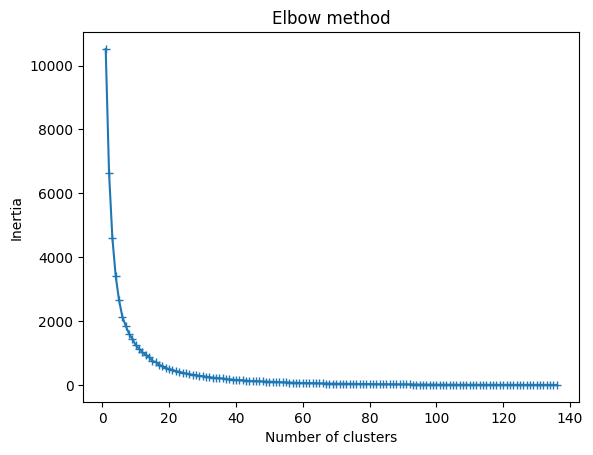

In [85]:
plt.plot(range(1,137), inertias, marker='+')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [89]:
k_means_result = KMeans(n_clusters = 10)
y = k_means_result.fit_predict(X)
print(y)

[3 2 7 1 6 5 2 2 2 8 8 7 0 8 5 2 7 8 3 4 6 4 1 3 9 6 8 9 7 7 3 8 2 6 3 0 5
 7 0 3 8 8 8 8 9 4 7 3 4 3 3 8 6 1 8 0 2 3 3 2 8 2 1 7 2 8 3 0 9 6 3 4 8 4
 6 2 2 3 3 1 0 8 6 9 1 7 3 8 6 7 1 7 1 6 3 6 7 1 3 3 1 6 4 2 4 2 4 9 1 0 4
 3 9 6 7 4 0 9 6 6 3 7 1 2 3 0 2 1 3 7 1 1 9 7 5 5]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


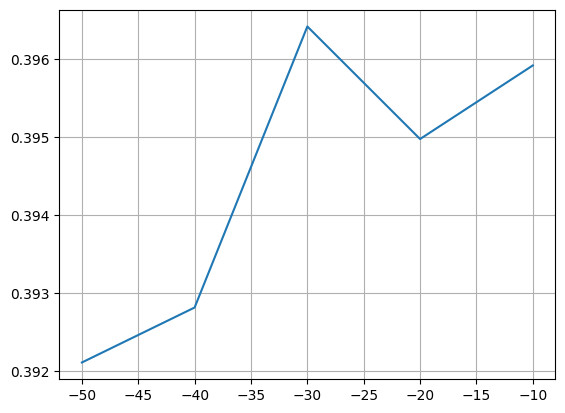

In [115]:
from sklearn import metrics
Preference = [-50, -40, -30,-20, -10]
silhouette_scores = []
for preference in Preference:
    model = AffinityPropagation(preference=preference, random_state=42)
    model.fit(X)

    silhouette_scores.append(metrics.silhouette_score(X , model.labels_))
silhouette_scores

# Create line plot of `Preference` vs `silhouette_scores`
plt.plot(Preference , silhouette_scores )
plt.grid()
plt.show()

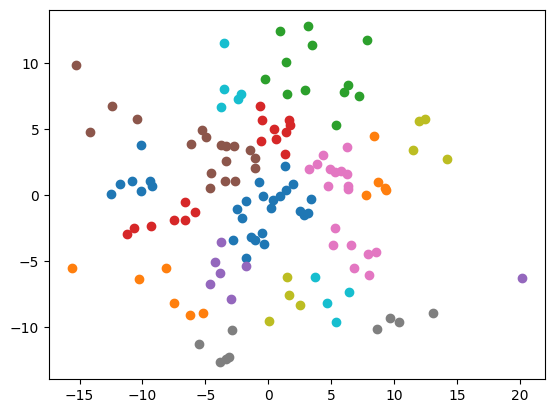

0.38604906822620744
22


In [118]:
from sklearn.cluster import AffinityPropagation
from numpy import unique
from numpy import where
model = AffinityPropagation(preference= -30, max_iter=50, damping=0.7, random_state=42, convergence_iter=20)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

from sklearn.metrics import silhouette_score
score = silhouette_score(X,yhat)
print(score)
print(len(clusters))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


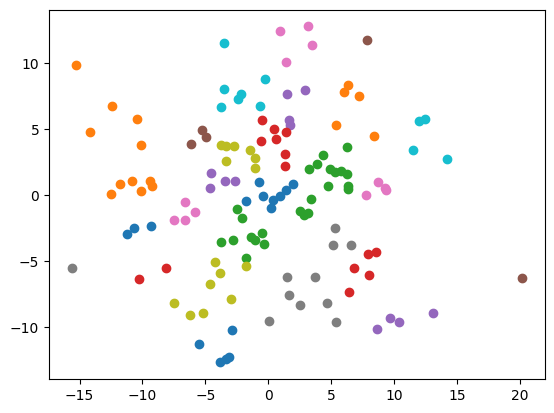

0.39277370731655264


In [123]:
# define the model
model = KMeans(n_clusters=29)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

from sklearn.metrics import silhouette_score
score = silhouette_score(X,yhat)
print(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


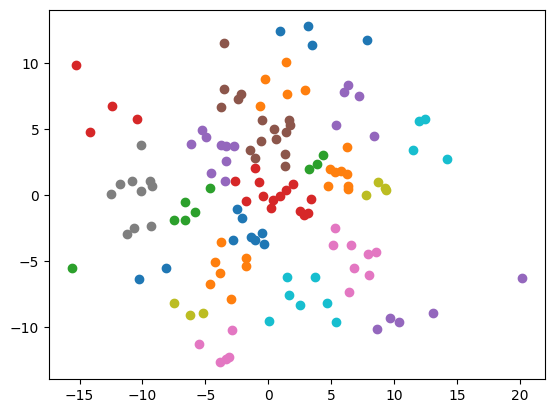

0.3738358103025291


In [110]:
# define the model
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=25)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

from sklearn.metrics import silhouette_score
score = silhouette_score(X,yhat)
print(score)